# some codes

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
plt.style.use('ggplot')

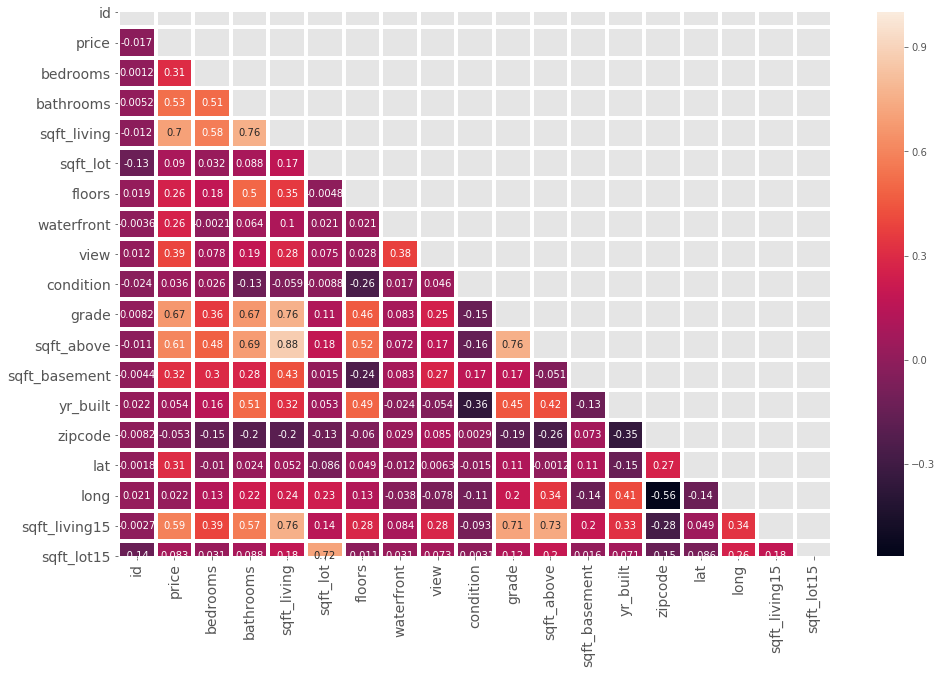

In [2]:
kc = pd.read_csv('data/kc_house_data_clean.csv')
corr_df = kc.corr()
# creating a mask to remove the duplicate of heatmap
mask = np.zeros_like(corr_df)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(kc.corr(), mask=mask, linewidth = 3, annot=True)

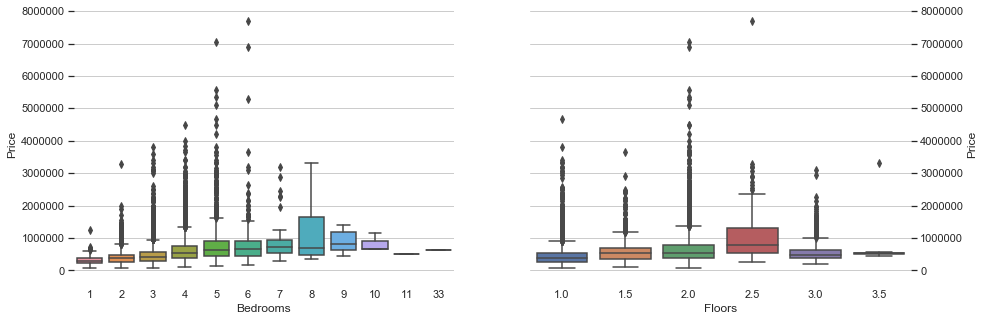

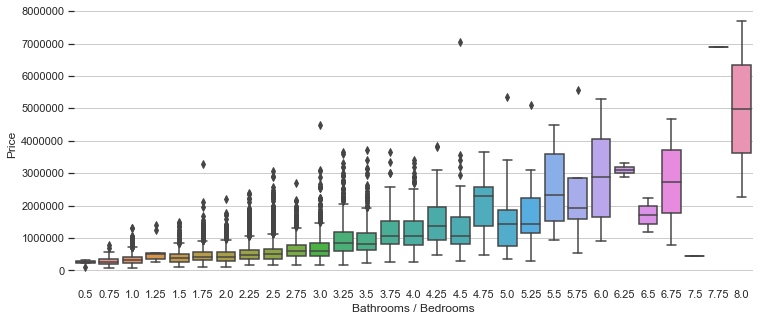

In [3]:
# Exploratory data analysis
df = kc
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

In [ ]:
#now we will commence feature ranking
from sklearn.feature_selection import RFE #first we are importing the necessary libraries
from sklearn.svm import SVR
# using SVM libraries linear kernal
linreg = SVR(kernel="linear")

r_list = [] #creating lists to store r squared and r squared adjusted
adj_r_list = []
list_n = list(range(2,21,1)) #creating a loop where we find the 5 best features and then go up by increments of 10 until we have the 65 best features 
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n) #selecting the pre-specified n most important features
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2) 
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    print(n)
    print(selected_columns)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
    print("\n\n")
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

In [ ]:
tmp_y = kc[["price"]]
tmp_X = kc.drop(["price", "id", "date"], axis=1)
tmp_X.shape
y = tmp_y.iloc[:,0].values
X = tmp_X.iloc[:,1:].values

for i in range(np.size(X,1)):
    print("formula = price ~ "+tmp_X.columns[i])
    regressor_OLS = sm.OLS(y, X[:, [i]]).fit()
    print(regressor_OLS.summary())
    print("################################################################################\n\n")

In [ ]:
tmp_y = kc[["price"]]
tmp_X = kc.drop(["price", "date"], axis=1)

y = tmp_y.iloc[:,0].values
X = tmp_X.iloc[:,1:].values

#X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]]
X_opt = X[:, [i for i in range(np.size(X,1))]]
regressor_OLS = sm.OLS(y, X_opt).fit()
regressor_OLS.summary()

### Test-Train split - mean squard error 

In [ ]:
#result.remove('view')
print(result)

In [ ]:
# 'view' still have a high p-values. So removed from the analysis
tmp_y = kc_final[["price"]]
tmp_X = kc_final[result]
y = tmp_y.iloc[:,0].values
X = tmp_X.iloc[:,0:].values

In [ ]:
# RMS error with scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))

    
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))
plt.title('MSE comparision',fontsize=30)
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend()
plt.savefig('img/Train_Test_error.png') # Save that figure
plt.show()